# Considering Outlier Detection

## » demonstrates the effect of a single outliers to other entries

### • creates a normal distributed data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.stats import pearsonr
# chooses a style for the plotting
plt.style.use('seaborn-whitegrid')
matplotlib inline
# use a random seed 101 to build the data
np.random.seed(101)
# creates a variabel named normal. which contains
# 1000 entries derived from a normal distribution
normal = np.random.normal(loc=0.0, scale= 1.0, size=1000)
# shows basic descriptive statistics
print(f'Mean: {np.mean(normal):.3f} Median {np.median(normal):.3f}')
print(f'Variance: {np.var(normal):.3f}')

Mean: 0.026 Median 0.032
Variance: 1.109


### • change a single value by inserting an outlying value

In [2]:
outlying = normal.copy()
outlying[0] = 50
# shows basic descriptive statistics
print(f'Mean: {np.mean(outlying):.3f} Median {np.median(outlying):.3f}')
print(f'Variance: {np.var(outlying):.3f}')
# uses pearson correlation between the original data
# with add outlier data
coef, p_val = pearsonr(normal, outlying)
print(f'Pearsons correlation coef: {coef:.3f} p-value: {p_val:.3f}')

Mean: 0.074 Median 0.032
Variance: 3.597
Pearsons correlation coef: 0.619 p-value: 0.000


## » Finding more things that can go wrong

## » Understanding anomalies and novel data

# Examining a Simple Univariate Method

### • import dataset

In [94]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.04,0.05,0.06,0.02,-0.04,-0.03,-0.04,-0.00,0.02,-0.02
1,-0.00,-0.04,-0.05,-0.03,-0.01,-0.02,0.07,-0.04,-0.07,-0.09
2,0.09,0.05,0.04,-0.01,-0.05,-0.03,-0.03,-0.00,0.00,-0.03
3,-0.09,-0.04,-0.01,-0.04,0.01,0.02,-0.04,0.03,0.02,-0.01
4,0.01,-0.04,-0.04,0.02,0.00,0.02,0.01,-0.00,-0.03,-0.05


### • using describe() to show the descriptive statistics

In [7]:
import pandas as pd
# sets the format of float number appeared in any pandas stuff
pd.options.display.float_format = '{:.2f}'.format
df = pd.DataFrame(X)
# shows the descriptive statistics 
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14


### • plots a boxplot to show the outliers

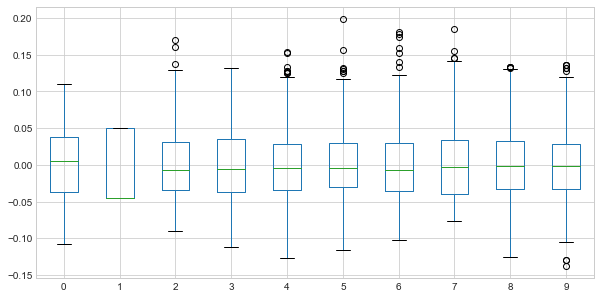

In [18]:
# sets a subplots 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
# creates a boxplot with axes as its axes
df.boxplot(ax=axes);

## » Leveraging on the Gaussian distribution

### • standardizing your data

In [51]:
from sklearn.preprocessing import StandardScaler
# standardizing the original datasets
Xs = StandardScaler().fit_transform(X)
# locate any entry that have more than 3 (3 sigma) as its value
# any(1) used to avoid duplicating
df[(np.abs(Xs)>3).any(1)]

,0,1,2,3,4,5,6,7,8,9
58,0.04,-0.04,-0.06,0.04,0.01,-0.06,0.18,-0.08,-0.00,-0.05
123,0.01,0.05,0.03,-0.00,0.15,0.20,-0.06,0.19,0.02,0.07
216,0.01,0.05,0.04,0.05,0.05,0.07,-0.07,0.15,0.05,0.05
230,-0.04,0.05,0.07,-0.06,0.15,0.16,0.00,0.07,0.05,0.07
256,-0.05,-0.04,0.16,-0.05,-0.03,-0.02,-0.05,0.03,0.03,0.01
260,0.04,-0.04,-0.01,-0.06,0.01,-0.03,0.15,-0.08,-0.08,-0.02
261,0.05,-0.04,-0.04,0.10,0.04,-0.03,0.18,-0.08,-0.01,0.02
269,0.01,-0.04,-0.03,-0.03,0.04,-0.01,0.16,-0.08,-0.01,-0.04
322,0.02,0.05,0.06,0.06,0.02,-0.04,-0.09,0.16,0.13,0.08
336,-0.02,-0.04,0.09,-0.04,0.09,0.09,-0.06,0.15,0.08,0.05


## » Making assumptions and checking out

### capping outlying values

In [137]:
# creates a copy of standardized data
Xs_capped = Xs.copy()
# get all of the index of any entry that have any value in any columns
# which is more than 3
o_idx = np.where(np.abs(Xs)>3)
# np.sign() recovers just only the sign (+1 or -1) from any value
# thats o_idx get earlier (its row and column index)
# and cap it into +-3
Xs_capped[o_idx] = np.sign(Xs[o_idx]) * 3
# shows the capped outlying cases
capped_df = pd.DataFrame(Xs_capped)
capped_df.iloc[o_idx[0]]

,0,1,2,3,4,5,6,7,8,9
58,0.88,-0.94,-1.35,0.75,0.26,-1.22,3.00,-1.61,-0.01,-1.07
123,0.11,1.07,0.73,-0.02,3.00,3.00,-1.30,3.00,0.33,1.54
123,0.11,1.07,0.73,-0.02,3.00,3.00,-1.30,3.00,0.33,1.54
123,0.11,1.07,0.73,-0.02,3.00,3.00,-1.30,3.00,0.33,1.54
216,0.27,1.07,0.75,1.04,1.12,1.56,-1.45,3.00,0.96,1.02
230,-0.80,1.07,1.50,-1.20,3.00,3.00,0.02,1.51,1.06,1.46
230,-0.80,1.07,1.50,-1.20,3.00,3.00,0.02,1.51,1.06,1.46
256,-1.03,-0.94,3.00,-0.99,-0.61,-0.42,-0.99,0.72,0.59,0.24
260,0.88,-0.94,-0.18,-1.20,0.17,-0.66,3.00,-1.61,-1.69,-0.37
261,1.03,-0.94,-0.88,2.20,0.75,-0.54,3.00,-1.61,-0.27,0.33


### using winsorizing approach

In [69]:
from scipy.stats.mstats import winsorize
# winsorizes the data with the limit 5th and 95th percentile
# limits para. sets the limit from the data
Xs_winsorized = winsorize(Xs, limits=(0.05, 0.05))
pd.DataFrame(Xs_winsorized).iloc[o_idx[0]]

,0,1,2,3,4,5,6,7,8,9
58,0.88,-0.94,-1.35,0.75,0.26,-1.22,1.62,-1.50,-0.01,-1.07
123,0.11,1.07,0.73,-0.02,1.62,1.62,-1.30,1.62,0.33,1.54
123,0.11,1.07,0.73,-0.02,1.62,1.62,-1.30,1.62,0.33,1.54
123,0.11,1.07,0.73,-0.02,1.62,1.62,-1.30,1.62,0.33,1.54
216,0.27,1.07,0.75,1.04,1.12,1.56,-1.45,1.62,0.96,1.02
230,-0.80,1.07,1.50,-1.20,1.62,1.62,0.02,1.51,1.06,1.46
230,-0.80,1.07,1.50,-1.20,1.62,1.62,0.02,1.51,1.06,1.46
256,-1.03,-0.94,1.62,-0.99,-0.61,-0.42,-0.99,0.72,0.59,0.24
260,0.88,-0.94,-0.18,-1.20,0.17,-0.66,1.62,-1.50,-1.50,-0.37
261,1.03,-0.94,-0.88,1.62,0.75,-0.54,1.62,-1.50,-0.27,0.33


### using RobustScaler by Scikit-learn

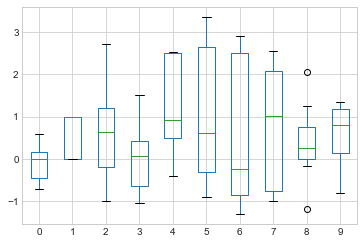

In [74]:
from sklearn.preprocessing import RobustScaler
# fitand transform the standardized data with Robustscaler
Xs_rescaled = RobustScaler().fit_transform(Xs)
df_rescaled = pd.DataFrame(Xs_rescaled).iloc[o_idx[0]]
# shows the boxplot od newly scaled data using RobustScaler
df_rescaled.boxplot();

# Developing a Multivariate Approach

## » Using principal component analysis

### finding the first 2 and the last 2 components using PCA and visualizing it

Variance by the components 1&2: 55.2
Variance by the last components: 0.9


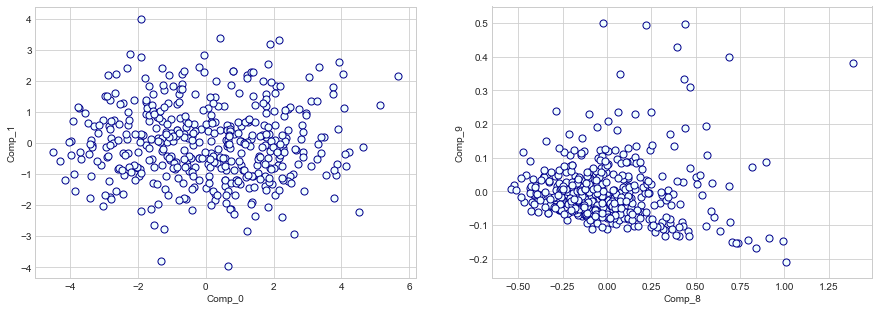

In [122]:
from sklearn.decomposition import PCA
# scale class used to standardize the data according to the data
# mean and spread it according to its variance
from sklearn.preprocessing import scale
from pandas.plotting import scatter_matrix
pca = PCA()
Xc = pca.fit_transform(scale(X))

# sum the explained variance from the first and last 2 comp.
first_2 = sum(pca.explained_variance_ratio_[:2]*100)
last_2 = sum(pca.explained_variance_ratio_[-2:]*100)

print(f'Variance by the components 1&2: {first_2:0.1f}')
print(f'Variance by the last components: {last_2:0.1f}')

# creates a df which consist all of the components and its value
df_pca = pd.DataFrame(Xc, columns=['Comp_' + str(i) for i in range(10)])

# set a subplots to arrange the plot later
# n_cols = 2 because we want to plot to scatter plot
# side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# plots the df_pca using scatter plot to see its dist.
# x para. determines the independent data
# y para. determines the dependent data
# s para. determines the size of each point
# grid para. used to shows the grid or nah
# c para. determines the fill color of each point
# edgecolor para. determines the color of the edge/lines of point
# ax para. determines the position of the plot
first_two = df_pca.plot.scatter(x='Comp_0', y='Comp_1',
                                s=50, grid=True, c='Azure',
                                edgecolors='DarkBlue',
                                ax=axes[0])
last_two = df_pca.plot.scatter(x='Comp_8', y='Comp_9',
                                s=50, grid=True, c='Azure',
                                edgecolors='DarkBlue',
                                ax=axes[1])
plt.show()
# the last_2 componenets. we can locate a possible outliers
# which is located using threshold of 0.3 for 10th comp. and
# of 1 for the 9th comp

### lists of all possible outliers according to the last 2 components

In [125]:
# list all of the boolean value that satisfy the condition
outlying = (Xc[:,-1] > 0.3) | (Xc[:,-2] > 1.0)
df[outlying]

,0,1,2,3,4,5,6,7,8,9
23,3.77,-1.76,1.09,0.72,-0.64,1.90,0.56,1.09,0.44,0.50
58,-2.65,2.23,2.79,-0.63,0.26,-0.13,1.44,0.67,1.01,-0.21
110,-2.04,-0.76,0.74,-1.93,-0.07,0.24,-1.75,-0.41,0.47,0.31
169,2.35,0.15,-0.13,1.19,-0.64,0.64,2.65,-0.31,0.22,0.50
254,3.82,-1.03,1.06,0.44,0.27,0.86,0.97,0.66,0.43,0.33
322,4.52,-2.24,-0.14,0.85,-0.47,0.73,1.28,0.34,1.39,0.38
323,3.87,-0.69,0.26,-0.58,-0.97,0.76,1.79,0.36,0.69,0.40
353,0.98,1.61,-1.16,1.14,-0.36,1.46,2.53,0.90,-0.02,0.50
371,2.11,-0.28,0.64,-0.65,-0.36,-0.26,2.22,1.09,0.07,0.35
394,2.24,-1.13,0.51,1.54,-1.30,-0.12,2.28,-0.10,0.40,0.43


## » Using cluster analysis for spotting outliers

### • using DBScan for outliers detection

In [143]:
from sklearn.cluster import DBSCAN
# creates a DBSCAN clutering algorithm with the parameters
DB = DBSCAN(eps=2.5, min_samples=25)
DB.fit(Xc)

from collections import Counter
print(Counter(DB.labels_))
# list all of the entries that are clustered in cluster -1
df[DB.labels_==-1]

Counter({0: 414, -1: 28})


,0,1,2,3,4,5,6,7,8,9
15,2.95,0.95,-1.98,-0.79,1.77,-1.05,1.38,-0.88,0.35,-0.09
23,3.77,-1.76,1.09,0.72,-0.64,1.90,0.56,1.09,0.44,0.50
29,-0.36,-1.41,3.27,-0.67,0.05,0.97,0.96,1.10,-0.17,-0.03
35,-0.70,1.88,1.36,-1.58,0.02,1.12,-0.04,2.12,0.32,-0.11
78,-1.57,-1.29,-0.66,0.50,-1.64,-0.64,1.98,-0.23,-0.22,-0.09
117,3.49,0.19,1.29,0.46,-0.80,1.71,0.84,-1.77,0.09,0.04
123,5.67,2.16,-2.83,-0.98,0.43,0.22,-1.25,-0.85,0.70,-0.09
141,3.31,-0.02,-1.76,1.79,-0.94,1.92,-1.10,-0.77,0.64,-0.12
161,5.13,1.23,-1.13,0.32,1.91,0.54,-0.07,-0.15,0.00,0.08
169,2.35,0.15,-0.13,1.19,-0.64,0.64,2.65,-0.31,0.22,0.50


## » Automating detection with Isolation Forest

### • executing IsolationForest

In [131]:
from sklearn.ensemble import IsolationForest

In [135]:
# creates a IsolationForest algorithm
# max_samples para. is the number of samples you want to use to
# train your algorithm
# contamination para. is the assumption of the 'contaminated'
# data percentage
auto_detection = IsolationForest(max_samples=50, 
                                 contamination=0.05,
                                 random_state=0)
auto_detection.fit(Xc)
# predicts the data from the trained IsolationForest algorithm
# and differs the 'contaminated' data into group -1 and the rest
# into group 1
evaluation = auto_detection.predict(Xc)
# shows all entries which predicted to be 'contamined' (group -1)
df[evaluation==-1]

,0,1,2,3,4,5,6,7,8,9
11,0.40,-0.63,-1.95,-1.44,-0.48,-1.73,-1.54,-0.67,0.56,0.20
15,2.95,0.95,-1.98,-0.79,1.77,-1.05,1.38,-0.88,0.35,-0.09
23,3.77,-1.76,1.09,0.72,-0.64,1.90,0.56,1.09,0.44,0.50
32,2.61,-2.94,-0.39,0.64,-0.48,-1.15,-1.38,-0.07,0.99,-0.15
58,-2.65,2.23,2.79,-0.63,0.26,-0.13,1.44,0.67,1.01,-0.21
123,5.67,2.16,-2.83,-0.98,0.43,0.22,-1.25,-0.85,0.70,-0.09
141,3.31,-0.02,-1.76,1.79,-0.94,1.92,-1.10,-0.77,0.64,-0.12
152,3.29,-0.52,-1.09,-0.35,1.18,0.75,0.21,-1.27,0.46,-0.12
169,2.35,0.15,-0.13,1.19,-0.64,0.64,2.65,-0.31,0.22,0.50
202,3.03,2.11,0.25,-1.55,-0.14,-0.97,1.14,1.03,-0.34,0.15


### • joining all of the possible outlier from the three techniques

In [155]:
results = [] 
for i, j, k in zip(evaluation==-1, DB.labels_==-1, outlying):
    if i == j == k == True:
        results.append(True)
    else:
        results.append(False)
        
df[results]

,0,1,2,3,4,5,6,7,8,9
23,3.77,-1.76,1.09,0.72,-0.64,1.90,0.56,1.09,0.44,0.50
169,2.35,0.15,-0.13,1.19,-0.64,0.64,2.65,-0.31,0.22,0.50
322,4.52,-2.24,-0.14,0.85,-0.47,0.73,1.28,0.34,1.39,0.38
323,3.87,-0.69,0.26,-0.58,-0.97,0.76,1.79,0.36,0.69,0.40
353,0.98,1.61,-1.16,1.14,-0.36,1.46,2.53,0.90,-0.02,0.50
394,2.24,-1.13,0.51,1.54,-1.30,-0.12,2.28,-0.10,0.40,0.43
